In [542]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np
import re
import itertools

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer

from scipy.sparse.linalg import norm

%matplotlib inline
import matplotlib.pyplot as plt

from df_builder_mini_cleaner import *

# Creating the DataFrame

In [2]:
cnn_df = pd.read_csv('data/cnn.csv')
fox_df = pd.read_csv('data/fox.csv')
onion_df = pd.read_csv('data/onion_csv.csv')

In [3]:
df_final = build_df(onion_df, fox_df, cnn_df)

In [5]:
df_final

,Article,Satire,CNN,Fox
0,washington in a statement confirming his suppo...,1,0,0
1,washington irked that the attorney general’s b...,1,0,0
2,stamford ct lamenting that the numbers were mu...,1,0,0
3,nairobi kenya warning that a complete overhaul...,1,0,0
4,napa ca after being lovingly tended by generat...,1,0,0
5,pineville la citing concerns over historically...,1,0,0
6,cambridge ma warning that nothing was more dan...,1,0,0
7,south bend in stumbling through the restaurant...,1,0,0
8,heaven speaking with obvious nostalgia regardi...,1,0,0
9,cary nc competing to secure the new pet’s alle...,1,0,0


### More Cleaning

In [667]:
def new_cleaner(df):
    '''
    Removes more features like punctuation and words that
    should not be in there
    Input: df_final
    output: df_final with cleaned articles
    '''
    article_list = list(df_final.Article)
    clean_list = []
    for article in article_list:
        samp1 = re.sub('[''\”\“\‘;:\'\'\'•·%$!&+}{|><_…/\’]', '', article)
        samp2 = re.sub('[-—]', ' ', samp1)
        samp3 = samp2.replace('news','')
        clean_list.append(samp3.replace('fox',''))
    df['Article'] = clean_list
    return df

In [668]:
new_df_final = new_cleaner(df_final)

In [669]:
new_df_final.Article[3001]

'newark nj having raised only 31 million last month despite clinching the republican nomination and with just 13 million on hand donald trumps presidential campaign sought a much needed injection of cash wednesday by holding a fundraising riot in newark sources confirmed were inviting our supporters to join donald for an afternoon of violent shoving enraged chanting and throwing sucker punches with all proceeds going toward our efforts to make america great again said trump campaign chairman paul manafort explaining that the event included a 50 a head clash with protesters in the parking lot outside the prudential center where complimentary rocks and glass bottles to throw would be provided gold level supporters who give over 500 to the campaign will have a reserved spot inside the vicious uncontrollable scrum in the arena where they can enjoy brawling with others or screaming racial slurs at the various minorities who will be on hand throughout the event and our platinum level donors 

# Word Count

In [680]:
def word_count(content_list):
    '''
    Takes in a list of fox articles that is a list of strings
    and then returns an average word count for each article.
    input: list of strings
    output: average word count per article
    '''
    
    count = 0
    words = 0
    
    
    # Come back for more preprocessing
    # Right now this is just a rough estimate
    # because the numbers in the articles are messing up
    # the count
    # (), "" are also messing up the count
    article_len=[]
    for x in content_list:
        length = len(x.split()) 
        article_len.append(str(length))
        words += length
        count += 1
    print(count)
    print(words)
    print(words/count)
    return words/count, article_len

In [681]:
onion_word_count, article_len = word_count(list(df_final.Article[0:5000]))

5000
924714
184.9428


In [683]:
df_final.Article[411]

'p class="ad label proxima"small class="proxima"advertisementsmall'

In [686]:
df_final.Article[1135]

'director james cameron known for films such as terminator and avatar has warned that climate change will destroy the great barrier reef unless humanity takes immediate action what do you think?'

In [701]:
df_final.Article[4950]

'p class="ad label proxima"small class="proxima"advertisementsmall'

In [708]:
df_final.Article[1135]

'director james cameron known for films such as terminator and avatar has warned that climate change will destroy the great barrier reef unless humanity takes immediate action what do you think?'

In [693]:
for x in article_len:
    int(x)

In [707]:
count = 0
for idx, art in enumerate(article_len):
    if int(art) < 101:
        print(idx, art)
        count+=1
print(count)

411 5
1135 31
1500 92
1683 92
1825 8
1863 97
1868 100
1882 77
1897 7
1898 16
1911 9
1921 17
1959 12
1966 97
1983 10
2020 8
2028 10
2066 100
2082 48
2102 86
2170 53
2210 16
2242 12
2298 12
2303 8
2327 9
2339 44
2551 17
2582 7
2587 50
2634 13
2669 10
2678 89
2717 2
2854 6
2875 13
2882 83
2916 3
2994 99
3060 70
3068 15
3108 47
3137 12
3169 10
3212 7
3214 10
3249 3
3257 36
3259 5
3282 7
3294 11
3330 51
3333 97
3360 5
3362 7
3376 4
3394 10
3407 7
3419 10
3427 6
3437 13
3450 12
3464 8
3502 7
3510 9
3523 7
3543 9
3586 9
3587 14
3596 12
3603 11
3616 11
3618 9
3669 92
3696 95
3713 92
3732 6
3740 98
3743 89
3767 9
3773 100
3828 8
3862 7
3926 8
3929 14
3930 45
3993 96
4013 11
4134 3
4235 5
4266 88
4371 16
4399 16
4510 80
4565 77
4674 95
4725 100
4914 99
4950 5
99


In [ ]:
questionable_article_len = [5]

In [34]:
cnn_word_count = word_count(list(df_final.Article[5000:10000]))

5000
3691602
738.3204


In [40]:
fox_word_count = word_count(list(df_final.Article[10000:]))

4354
2273203
522.0953146531924


In [45]:
word_counts_df = pd.DataFrame([['Onion', onion_word_count], ['CNN', cnn_word_count], ['Fox', fox_word_count]], columns=['Source', 'Average_Word_Count'])

Text(0.5, 0, 'Source')

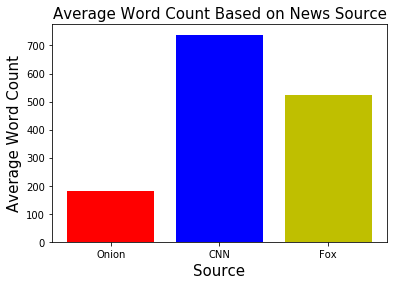

In [48]:
fig, ax = plt.subplots()
plt.bar(word_counts_df.Source.values,word_counts_df.Average_Word_Count, color ='rby')
ax.set_title("Average Word Count Based on News Source", fontsize = 15)
ax.set_ylabel("Average Word Count", fontsize = 15)
ax.set_xlabel("Source", fontsize = 15)

# Models

### Tokenizing and Stemming

In [608]:
porter = PorterStemmer()

In [609]:
def tokenize(doc):
    return [porter.stem(word) for word in word_tokenize(doc)]

### Train Test Split

In [573]:
docs_train, docs_test, y_train, y_test = train_test_split(new_df_final['Article'], new_df_final['Satire'])

### TFIDF Vectorization 

In [641]:
cust_stop_words = ['serious', 'any', 'ours', 'go', 'do','else', 'while', 'somehow', 'seem', 'front', 'thick', 'once', 'system', 'latter', 'amongst', 'hence', 'un',
 'cannot', 'more', 'eight', 'he', 'seems', 'it', 'hereafter', 'last', 'here', 'beyond', 'because', 'few', 'fill',
 'his', 'further', 'sincere', 'their', 'made', 'fifty', 'whatever', 'whenever', 'been', 'describe', 'otherwise', 'or',
 'our', 'move', 'eg', 'over', 'per', 'amoungst', 'perhaps', 'you', 'beside', 'hundred', 'across', 'which',
 'where', 'anyone', 'anywhere', 'name', 'several', 'a', 'no', 'whence', 'mostly', 'so', 'call', 'seemed', 'everyone',
 'these', 'besides', 'whom', 'whereby', 'eleven', 'thereupon', 'twelve', 'when', 'former', 'most', 'therein', 'had',
 'hasnt', 'yourself', 'next', 'being', 'wherein', 'only', 'them', 'third', 'mine', 'show', 'nobody',
 'sometimes', 'somewhere', 'still', 'were', 'with', 'became', 'how', 'yourselves', 'her', 'much', 'ltd', 'as', 'those',
 'done', 'twenty', 'along', 'get', 'herself', 'interest', 'nor', 'however', 'same', 'side', 'whole', 'namely',
 'might', 'if', 'has', 'up', 'both', 'not', 'bottom', 'ourselves', 'via', 'whither', 'fifteen', 'your', 'mill', 'someone', 'even',
 'please', 'thus', 'under', 'are', 'in', 'etc', 'anyhow', 'after', 'hereupon', 'my', 'from', 'through', 'before', 'own', 'against', 'below', 'throughout', 'although', 'herein',
 'himself', 'noone', 'will', 'also', 'thru', 'out', 'keep', 'something', 'there', 'nevertheless', 'nine', 'always',
 'except', 'almost', 'some', 'couldnt', 'hereby', 'indeed', 'detail', 'moreover', 'hers', 're', 'all', 'six',
 'themselves', 'two', 'already', 'forty', 'thereby', 'become', 'each', 'thence', 'within', 'nowhere', 'by', 'due', 'full', 'thin', 'us', 'anyway', 'other', 'among', 'this', 'though', 'without', 'then', 'five', 'another', 'first', 'myself', 'every', 'at', 'de', 'toward',
'whereafter', 'alone', 'beforehand', 'amount', 'ie', 'meanwhile', 'behind', 'must', 'now', 'others',
 'many', 'be', 'con', 'an', 'formerly', 'everywhere', 'therefore', 'find', 'to', 'together', 'could', 'elsewhere', 'about', 'three', 'am', 'since', 'me', 'whose', 'ever', 'cry', 'becoming', 'whereas', 'see', 'well', 'back', 'everything', 'nothing', 'whether', 'itself',
 'whoever', 'often', 'never', 'down', 'top', 'least', 'too', 'of', 'during', 'inc', 'less', 'that', 'she', 'give', 'than',
 'latterly', 'they', 'fire', 'found', 'the', 'bill', 'thereafter', 'enough', 'very', 'have', 'its', 'who', 'anything',
 'afterwards', 'around', 'upon', 'but', 'either', 'again', 'should', 'what', 'into', 'none', 'would', 'can', 'for', 'put', 'empty', 'why', 'is', 'him',
 'above', 'between', 'four', 'off', 'cant', 'may', 'sometime', 'until', 'and', 'part', 'yet', 'onto', 'towards','neither',
 'yours', 'we', 'take', 'rather', 'on', 'such', 'was', 'ten', 'becomes', 'co', 'one', 'i', 'seeming', 'wherever','whereupon','sixty','abov', 'afterward', 
'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els',
'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr',
'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 
'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth',
'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 
'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv','anywh', 'becau', 'el', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh']

In [642]:
vect = TfidfVectorizer(stop_words=cust_stop_words, tokenizer=tokenize, min_df=3)
X_train = vect.fit_transform(docs_train)
X_test = vect.transform(docs_test)

### Logistic Regression Model

In [643]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/jphooster22/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [644]:
log_reg_y_pred = log_reg.predict(X_test)
log_reg_con_mat = confusion_matrix(y_test, log_reg_y_pred)
recall_log_reg = log_reg_con_mat[1,1]/(log_reg_con_mat[1,1]+log_reg_con_mat[1,0])
prec_log_reg = log_reg_con_mat[1,1]/(log_reg_con_mat[1,1]+log_reg_con_mat[0,1])
F1_log_reg = ((prec_log_reg*recall_log_reg)/(prec_log_reg+recall_log_reg))*2
F1_log_reg

0.9708418891170432

### Naive Bayes Model

In [645]:
na_ba = MultinomialNB(alpha=.1)
na_ba.fit(X_train, y_train)



MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [646]:
na_ba_pred = na_ba.predict(X_test)
na_ba_con_mat = confusion_matrix(y_test, na_ba_pred)
recall_na_ba= na_ba_con_mat[1,1]/(na_ba_con_mat[1,1]+na_ba_con_mat[1,0])
prec_na_ba = na_ba_con_mat[1,1]/(na_ba_con_mat[1,1]+na_ba_con_mat[0,1])
F1_na_ba = ((prec_na_ba*recall_na_ba)/(prec_na_ba+recall_na_ba))*2
F1_na_ba

0.8969849246231155

# Data Vis for Models

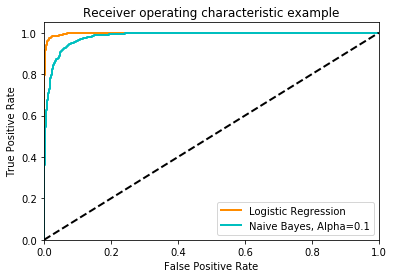

In [647]:
roc_log_reg  = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1], pos_label=1)
roc_na_ba  = roc_curve(y_test, na_ba.predict_proba(X_test)[:,1], pos_label=1)
plt.figure()
lw = 2
plt.plot(roc_log_reg[0], roc_log_reg[1], color='darkorange',
         lw=lw, label='Logistic Regression')

plt.plot(roc_na_ba[0], roc_na_ba[1], color='c',
         lw=lw, label='Naive Bayes, Alpha=0.1')
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [648]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[2336   29]
 [  42 1182]]


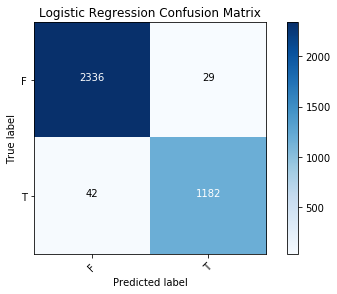

In [649]:
plot_confusion_matrix(log_reg_con_mat,['F','T'], title='Logistic Regression Confusion Matrix')

Confusion matrix
[[2272   93]
 [ 153 1071]]


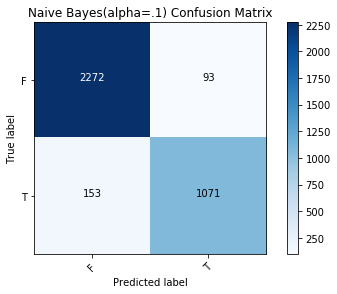

In [650]:
plot_confusion_matrix(na_ba_con_mat,['F','T'], title='Naive Bayes(alpha=.1) Confusion Matrix')

# Feature Exploration

In [651]:
features = vect.get_feature_names()

log_reg_coef = log_reg.coef_.reshape(log_reg.coef_.shape[1],)

In [652]:
log_reg.coef_.shape[1]

21494

In [653]:
len(features), len(log_reg_coef)

(21494, 21494)

In [654]:
feature_df = pd.DataFrame(features)

In [655]:
feature_df

,0
0,#
1,''
2,*
3,**
4,**want
5,*winner
6,/strong
7,0
8,00
9,000


In [656]:
feature_df['Beta_Coef'] = log_reg_coef
feature_df['Word'] = feature_df[0]

In [657]:
beta_feature_df = feature_df[['Beta_Coef', 'Word']]

In [658]:
sort = beta_feature_df.sort_values('Beta_Coef')

In [659]:
sort

,Beta_Coef,Word
16606,-5.745505,said
19637,-4.520475,trump
16555,-4.380635,s
14777,-4.184993,polic
19346,-4.035709,told
9,-3.873314,000
19777,-3.788624,u
1108,-3.533945,accord
16744,-2.699208,saturday
14388,-2.693266,peopl


In [660]:
bot_10=list(sort['Beta_Coef'][0:10])
top_10=list(sort['Beta_Coef'][-10:])
bot_top = bot_10 +top_10

In [661]:
bot_10_words = list(sort['Word'][0:10])
top_10_words = list(sort['Word'][-10:])
top_bot_words = bot_10_words + top_10_words

Text(0.5, 0, 'Word')

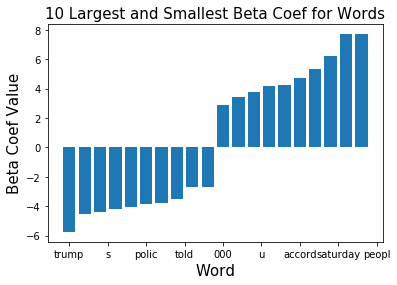

In [662]:
data = bot_top
labels = top_bot_words
fig, ax = plt.subplots()

plt.bar(np.arange(len(data)), data)
#ax.set_xticks(np.arange(len(data)))
ax.set_xticklabels(labels)
ax.set_title("10 Largest and Smallest Beta Coef for Words", fontsize = 15)
ax.set_ylabel("Beta Coef Value", fontsize = 15)
ax.set_xlabel("Word", fontsize = 15)

### Average Magnitude of TFIDF Vector for Satire and News

In [600]:
def avg_tfidf_mag(X_train_vect, y_train):
    '''
    Calculates the average magnitude of the TFIDF vector for Satire and News 
    categories
    input: sparse matrix for training
    '''
    row_norms=[]
    for row in X_train:
        row_norms.append(norm(row))
    sums_arr =np.array(row_norms)
    ytr_arr = np.array(y_train)
    tot_sat_art = np.sum(ytr_arr)
    tot_news_art = len(ytr_arr) - tot_sat_art
    Sat_avg_mag = sums_arr[ytr_arr==1].sum()/tot_sat_art
    News_avg_mag = sums_arr[ytr_arr==0].sum()/tot_news_art
    return Sat_avg_mag, News_avg_mag

In [601]:
Satire_mag, News_mag = avg_tfidf_mag(X_train, y_train)

In [602]:
Satire_mag, News_mag

(0.9997351694915254, 0.9997138360280441)

Text(0.5, 0, 'Type of Article')

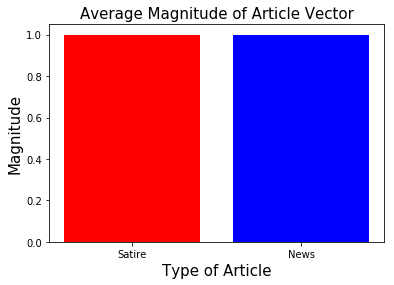

In [603]:
fig, ax = plt.subplots()
plt.bar(['Satire', 'News'],[Satire_mag, News_mag], color ='rby')
ax.set_title("Average Magnitude of Article Vector", fontsize = 15)
ax.set_ylabel("Magnitude", fontsize = 15)
ax.set_xlabel("Type of Article", fontsize = 15)

### SVD